# Data Import from different sources
## Importing of Data from Plc 12.01:29-12:08:30

In [1]:
import numpy as np
import struct

#filename = '../data/PMPM_RAW_BIN_60s_20241023_084401.csv'

rawFilename = '../data/Plc/PMPM_RAW_BIN_60s_20241031_120'
filename=['129.csv', '229.csv', '329.csv', '429.csv', '530.csv', '630.csv', '730.csv', '830.csv', '930.csv']
filename = [(rawFilename + filename[a]) for a in range(len(filename))]

print(filename)


['../data/Plc/PMPM_RAW_BIN_60s_20241031_120129.csv', '../data/Plc/PMPM_RAW_BIN_60s_20241031_120229.csv', '../data/Plc/PMPM_RAW_BIN_60s_20241031_120329.csv', '../data/Plc/PMPM_RAW_BIN_60s_20241031_120429.csv', '../data/Plc/PMPM_RAW_BIN_60s_20241031_120530.csv', '../data/Plc/PMPM_RAW_BIN_60s_20241031_120630.csv', '../data/Plc/PMPM_RAW_BIN_60s_20241031_120730.csv', '../data/Plc/PMPM_RAW_BIN_60s_20241031_120830.csv', '../data/Plc/PMPM_RAW_BIN_60s_20241031_120930.csv']


In [2]:
values = []
for file in filename:
    print('Reading file:',file)
    
    # Lire le fichier .csv qui contient le flux de bytes
    with open(file, 'rb') as f:
        byte_stream = f.read()  # Lire tout le fichier comme un flux de bytes
    num_values = len(byte_stream) // 2  # Calcul du nombre d'entiers


    for i in range(num_values):
        two_bytes = byte_stream[i*2:(i*2)+2]
        value = struct.unpack('<h', two_bytes)[0]  # '<h' pour 2 bytes en short int
        values.append(value)
print("List created with : {} elements".format(len(values)))

Reading file: ../data/Plc/PMPM_RAW_BIN_60s_20241031_120129.csv
Reading file: ../data/Plc/PMPM_RAW_BIN_60s_20241031_120229.csv
Reading file: ../data/Plc/PMPM_RAW_BIN_60s_20241031_120329.csv
Reading file: ../data/Plc/PMPM_RAW_BIN_60s_20241031_120429.csv
Reading file: ../data/Plc/PMPM_RAW_BIN_60s_20241031_120530.csv
Reading file: ../data/Plc/PMPM_RAW_BIN_60s_20241031_120630.csv
Reading file: ../data/Plc/PMPM_RAW_BIN_60s_20241031_120730.csv
Reading file: ../data/Plc/PMPM_RAW_BIN_60s_20241031_120830.csv
Reading file: ../data/Plc/PMPM_RAW_BIN_60s_20241031_120930.csv
List created with : 54540000 elements


## Data imported for PLC 12.01:29-12:08:30, classification between Dig. Input, Accel X, Sound 

In [3]:
npValues=np.array(values, dtype=np.int16)
start_size=1
sound_size=50
accel_size=50
slice_size=start_size+sound_size+accel_size
num_slice = len(npValues)//slice_size # Nombre de tranches

start_indices=np.concatenate([np.arange(i*slice_size, i*slice_size+start_size) for i in range(num_slice)])
sound_indices=np.concatenate([np.arange(i*slice_size+start_size, i*slice_size+sound_size+1) for i in range(num_slice)])
accel_indices=np.concatenate([np.arange(i*slice_size+start_size+sound_size, i*slice_size+slice_size) for i in range(num_slice)])
startValues=npValues[start_indices]
soundValues=npValues[sound_indices]
accelXValues=npValues[accel_indices]
myPlCTime=np.arange('2024-10-31T12:01:29.000016', '2024-10-31T12:10:29.000016', step=20, dtype='datetime64[us]')

fs=50000
# restrain window to comply with data gathered with NI acquisition
myPlCTime=myPlCTime[np.int32(187.90094*fs):np.int32(487.90094*fs)]
startValues=startValues[fs*186//50:fs*486//50]
soundValues=soundValues[fs*186:fs*486]
accelXValues=accelXValues[fs*186:fs*486]

plc_values = dict({'Time':myPlCTime,'Sound values ': soundValues, 'Accel X values ': accelXValues, 'Start values ': startValues})



sample_table_size = 50
print("Data classified.\n Number of digital samples is : {}, that is {}s \n Number of sampled sound values : {}, that is {}s \n Number of sampled accel X values : {}, that is {}s \n".format(len(startValues), len(startValues)/(fs/sample_table_size), len(soundValues), len(soundValues)/fs,len(accelXValues), len(accelXValues)/fs))
print(start_indices[:5])
print(sound_indices[:200])
print(accel_indices[:200])


Data classified.
 Number of digital samples is : 300000, that is 300.0s 
 Number of sampled sound values : 15000000, that is 300.0s 
 Number of sampled accel X values : 15000000, that is 300.0s 

[  0 101 202 303 404]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 250 251 252 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333
 334 335 336 337 338 339 340 341 342 343 344 345 346

In [4]:

print(myPlCTime.shape, myPlCTime[0:10], myPlCTime[-10:-1])

(15000000,) ['2024-10-31T12:04:36.900956' '2024-10-31T12:04:36.900976'
 '2024-10-31T12:04:36.900996' '2024-10-31T12:04:36.901016'
 '2024-10-31T12:04:36.901036' '2024-10-31T12:04:36.901056'
 '2024-10-31T12:04:36.901076' '2024-10-31T12:04:36.901096'
 '2024-10-31T12:04:36.901116' '2024-10-31T12:04:36.901136'] ['2024-10-31T12:09:36.900756' '2024-10-31T12:09:36.900776'
 '2024-10-31T12:09:36.900796' '2024-10-31T12:09:36.900816'
 '2024-10-31T12:09:36.900836' '2024-10-31T12:09:36.900856'
 '2024-10-31T12:09:36.900876' '2024-10-31T12:09:36.900896'
 '2024-10-31T12:09:36.900916']


In [5]:
print('Data imported for PLC 12.04:36-12:09:36, classification in dictionnary plc_values with keys : {}'.format(plc_values.keys()))

Data imported for PLC 12.04:36-12:09:36, classification in dictionnary plc_values with keys : dict_keys(['Time', 'Sound values ', 'Accel X values ', 'Start values '])


## Import of Data from NIAcquisition 12.04:00-12:09:00


In [6]:
rawFilename = '../data/NI/Measure_vibration__24-10-31_120'
filename=['4.tdms','5.tdms','6.tdms','7.tdms','8.tdms']
filename = [(rawFilename + filename[a]) for a in range(len(filename))]
print(filename)

['../data/NI/Measure_vibration__24-10-31_1204.tdms', '../data/NI/Measure_vibration__24-10-31_1205.tdms', '../data/NI/Measure_vibration__24-10-31_1206.tdms', '../data/NI/Measure_vibration__24-10-31_1207.tdms', '../data/NI/Measure_vibration__24-10-31_1208.tdms']


In [7]:
from nptdms import TdmsFile
def import_tdms(path, myDict={}):
    tdms_file = TdmsFile.read(path)
    for group in tdms_file.groups():
        group_name = group.name
        for channel in group.channels():
            channel_name = channel.name
            # Access dictionary of properties:
            properties = channel.properties
            # Access numpy array of data for channel:
            data = channel[:]
            # Stores the data in the dictionnary
            if channel_name in myDict:
                myDict[channel_name]=np.append(myDict[channel_name],np.array(data))
            else:
                myDict[channel_name] = np.array(data)
            #myDict[channel_name] = data

my_NI_data={}

#myFirstData=import_tdms(filename[-1])
for file in filename:
    print('Reading file:',file)
    import_tdms(file, myDict=my_NI_data)
    print(my_NI_data.keys(), my_NI_data['Time'][0], my_NI_data['Time'][-1], my_NI_data['Time'].shape, type(my_NI_data['Time'])) 
print(my_NI_data['Time'][-50:-1])

Reading file: ../data/NI/Measure_vibration__24-10-31_1204.tdms
dict_keys(['Time', 'VIB_2024_001_X', 'VIB_2024_001_Y', 'VIB_2024_001_Z']) 2024-10-31T11:04:36.900956 2024-10-31T11:05:36.900916 (1500000,) <class 'numpy.ndarray'>
Reading file: ../data/NI/Measure_vibration__24-10-31_1205.tdms
dict_keys(['Time', 'VIB_2024_001_X', 'VIB_2024_001_Y', 'VIB_2024_001_Z']) 2024-10-31T11:04:36.900956 2024-10-31T11:06:36.900916 (3000000,) <class 'numpy.ndarray'>
Reading file: ../data/NI/Measure_vibration__24-10-31_1206.tdms
dict_keys(['Time', 'VIB_2024_001_X', 'VIB_2024_001_Y', 'VIB_2024_001_Z']) 2024-10-31T11:04:36.900956 2024-10-31T11:07:36.900916 (4500000,) <class 'numpy.ndarray'>
Reading file: ../data/NI/Measure_vibration__24-10-31_1207.tdms
dict_keys(['Time', 'VIB_2024_001_X', 'VIB_2024_001_Y', 'VIB_2024_001_Z']) 2024-10-31T11:04:36.900956 2024-10-31T11:08:36.900916 (6000000,) <class 'numpy.ndarray'>
Reading file: ../data/NI/Measure_vibration__24-10-31_1208.tdms
dict_keys(['Time', 'VIB_2024_001_

In [8]:
print("Data imported for NI from {} to {}, classification in dictionnary data with keys : {}".format(my_NI_data['Time'][0],my_NI_data['Time'][-1],my_NI_data.keys()))
print('Time data is : {}, with shape {}'.format(my_NI_data['Time'], my_NI_data['Time'].shape))

Data imported for NI from 2024-10-31T11:04:36.900956 to 2024-10-31T11:09:36.900916, classification in dictionnary data with keys : dict_keys(['Time', 'VIB_2024_001_X', 'VIB_2024_001_Y', 'VIB_2024_001_Z'])
Time data is : ['2024-10-31T11:04:36.900956' '2024-10-31T11:04:36.900996'
 '2024-10-31T11:04:36.901036' ... '2024-10-31T11:09:36.900836'
 '2024-10-31T11:09:36.900876' '2024-10-31T11:09:36.900916'], with shape (7500000,)


# Data Analysis

In [9]:
print(type(my_NI_data['VIB_2024_001_Y'][0]), type(my_NI_data['VIB_2024_001_Z'][0]), type(my_NI_data['VIB_2024_001_X'][0]))

<class 'numpy.float64'> <class 'numpy.float64'> <class 'numpy.float64'>


Accel in int16 Max Value is 3885, Min Value is -3525
Accel in m/s2 Max Value is 58.15406799316406, Min Value is -52.76527404785156
Sound (Plc Beckhoff)


C:\Users\Julie\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


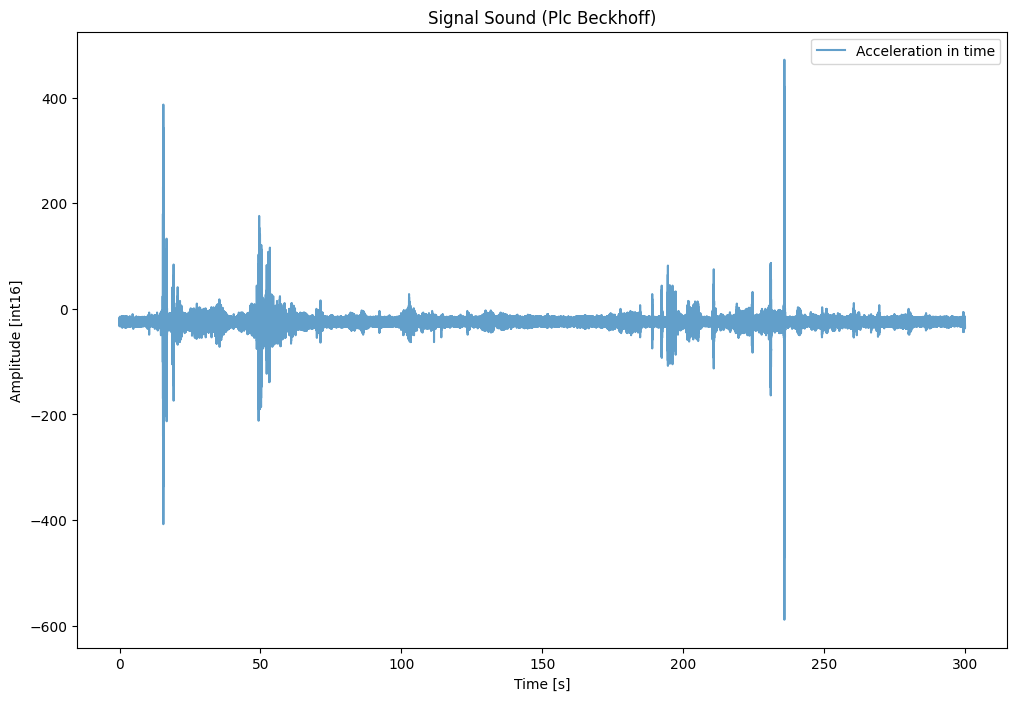

Acceleration X (Plc Beckhoff)


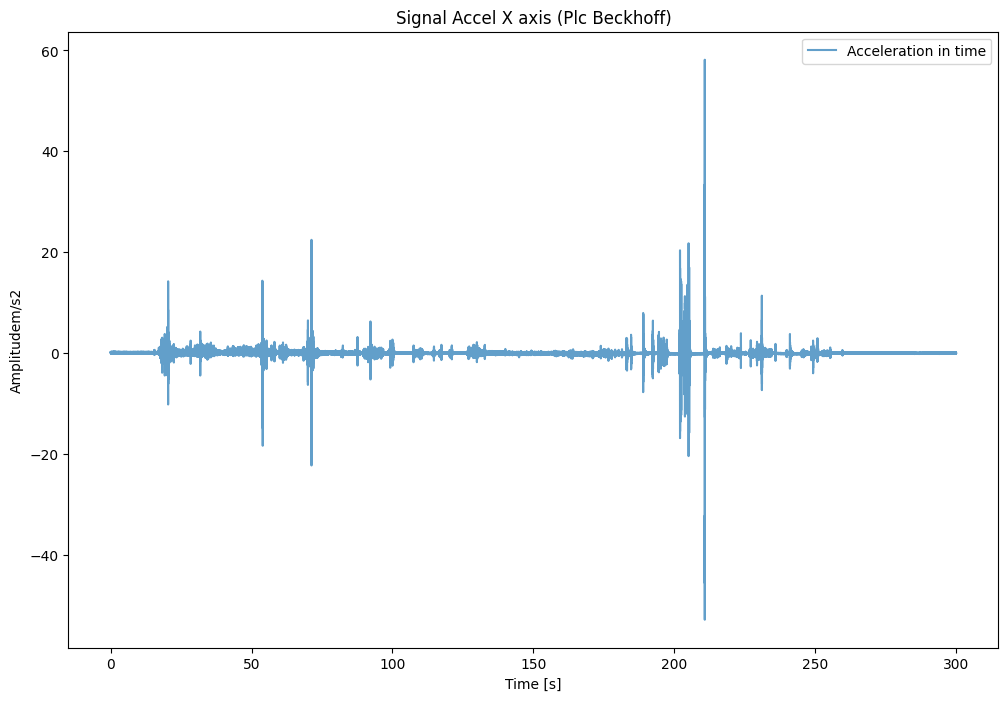

Acceleration Y & Z (NI Acquisition)
Accel Y in g Max Value is 5.2481559833908635, Min Value is -8.122904088416243
Accel Z in g Max Value is 4.519525941211832, Min Value is -6.269793245066793


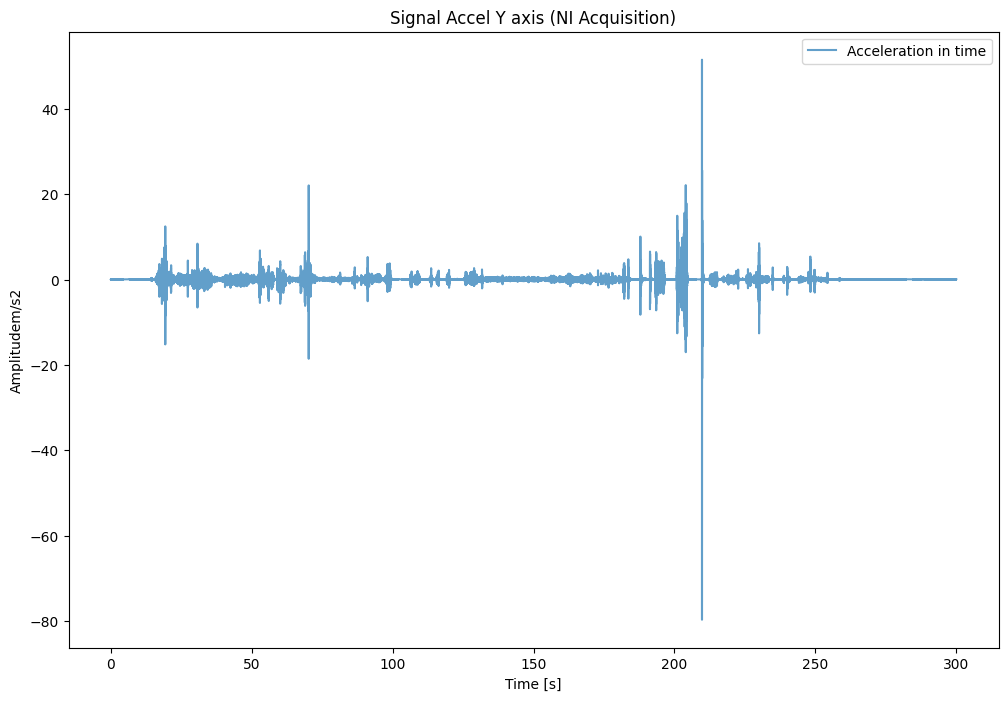

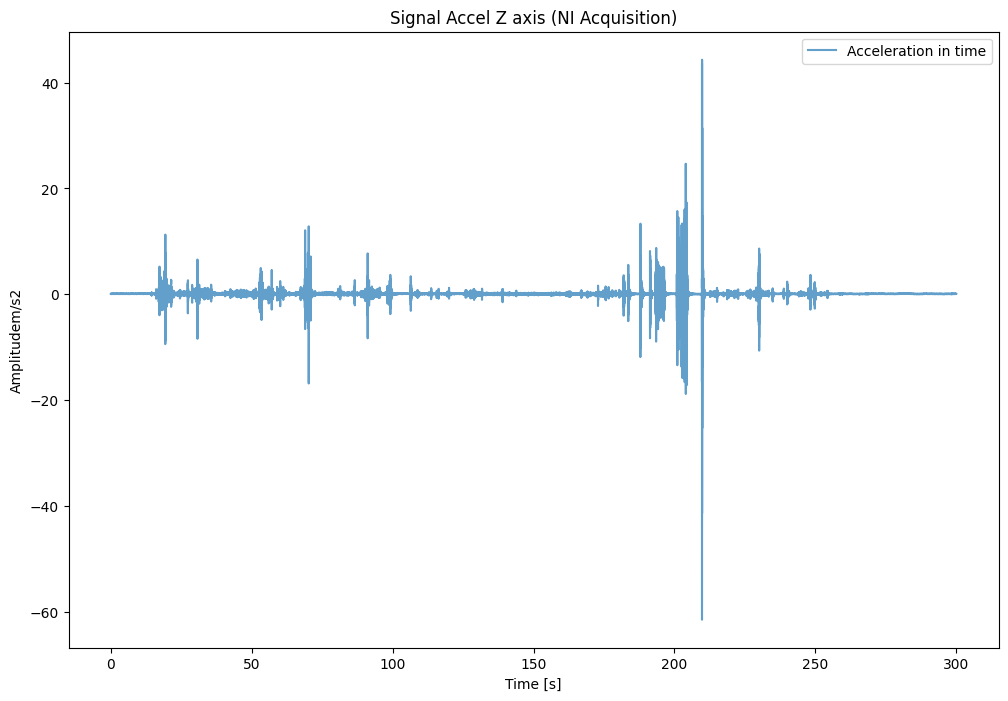

In [10]:
import matplotlib.pyplot as plt
accelValues=accelXValues.copy()
accelValues=accelValues*(50*9.81/(2**15))
soundValues=soundValues.copy()

print("Accel in int16 Max Value is {}, Min Value is {}".format(np.max(accelXValues), np.min(accelXValues)))
print("Accel in m/s2 Max Value is {}, Min Value is {}".format(np.max(accelValues), np.min(accelValues)))

def plot_Accel(accelValues, fs, start=0, end=-1, measUnit="m/s2", title="Signal Accel X axis"):
    plt.figure(figsize=(12, 8))
    x=np.arange(len(accelValues[start:end]))*1/fs
    
    if (measUnit=="g"):
        accelValues=accelValues/9.81
    plt.plot(x,accelValues[start:end], label='Acceleration in time', alpha=0.7)
    plt.legend()
    plt.title(title)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude'+measUnit)
    plt.show()
    
def plot_Sound(soundValues, fs, start=0, end=-1, measUnit="int16", title="Signal Audio"):
    plt.figure(figsize=(12, 8))
    x=np.arange(len(soundValues[start:end]))*1/fs
    
    plt.plot(x,soundValues[start:end], label='Acceleration in time', alpha=0.7)
    plt.legend()
    plt.title(title)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude ['+measUnit+']')
    plt.show()

fs=50000
print("Sound (Plc Beckhoff)")
plot_Sound(soundValues, fs, measUnit="int16", title="Signal Sound (Plc Beckhoff)")
print("Acceleration X (Plc Beckhoff)")
plot_Accel(accelValues, fs, measUnit="m/s2", title="Signal Accel X axis (Plc Beckhoff)")
accelYValues=my_NI_data['VIB_2024_001_Y']*9.81
accelZValues=my_NI_data['VIB_2024_001_Z']*9.81
print("Acceleration Y & Z (NI Acquisition)")
print("Accel Y in ""g"" Max Value is {}, Min Value is {}".format(np.max(my_NI_data['VIB_2024_001_Y']), np.min(my_NI_data['VIB_2024_001_Y'])))
print("Accel Z in ""g"" Max Value is {}, Min Value is {}".format(np.max(my_NI_data['VIB_2024_001_Z']), np.min(my_NI_data['VIB_2024_001_Z'])))
plot_Accel(accelYValues, fs//2, measUnit="m/s2", title="Signal Accel Y axis (NI Acquisition)")
plot_Accel(accelZValues, fs//2, measUnit="m/s2", title="Signal Accel Z axis (NI Acquisition)")

 - Play the recorded sound below

In [11]:
import sounddevice as sd
audio = soundValues.copy()
audio = np.int16(audio/np.max(np.abs(audio))*(2**15-1))  # Normalisation
# Start playback
sd.play(audio,samplerate=fs)
sd.wait()

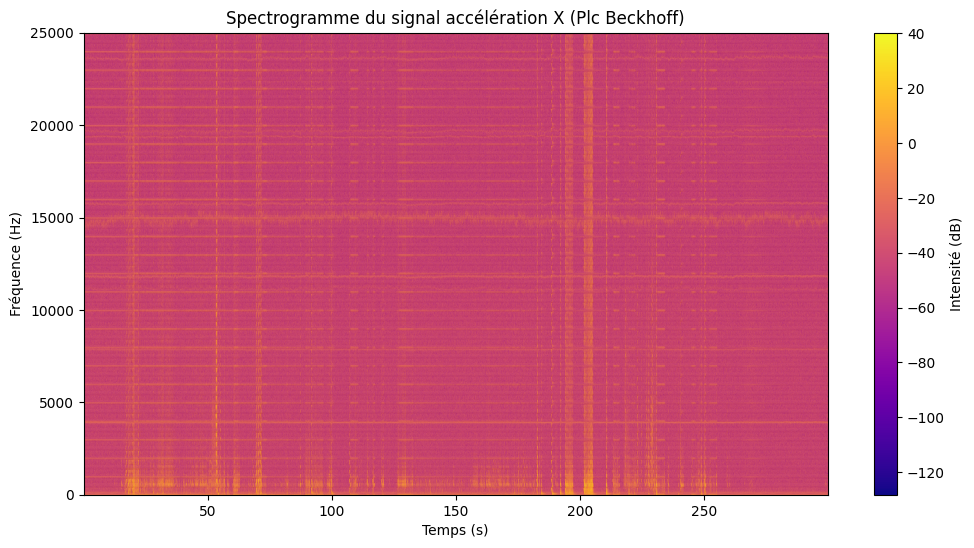

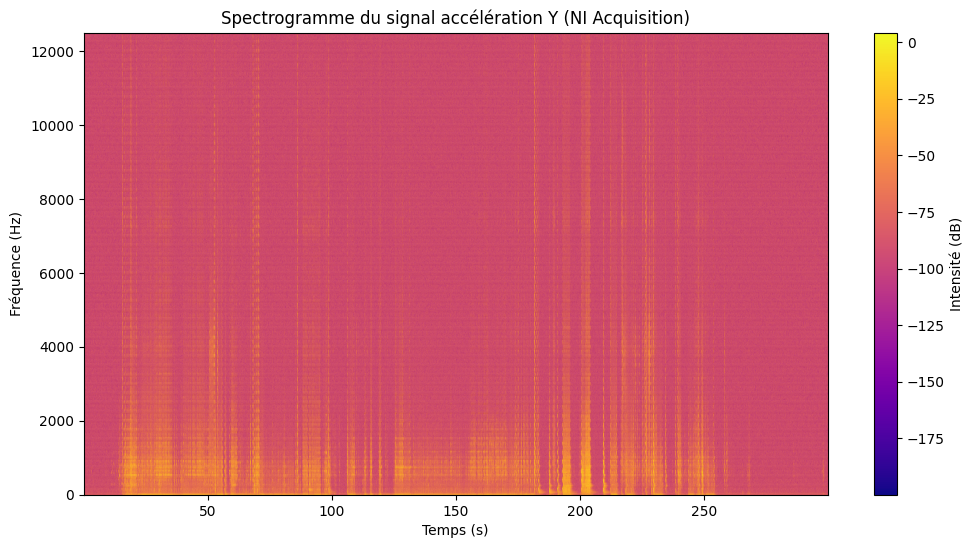

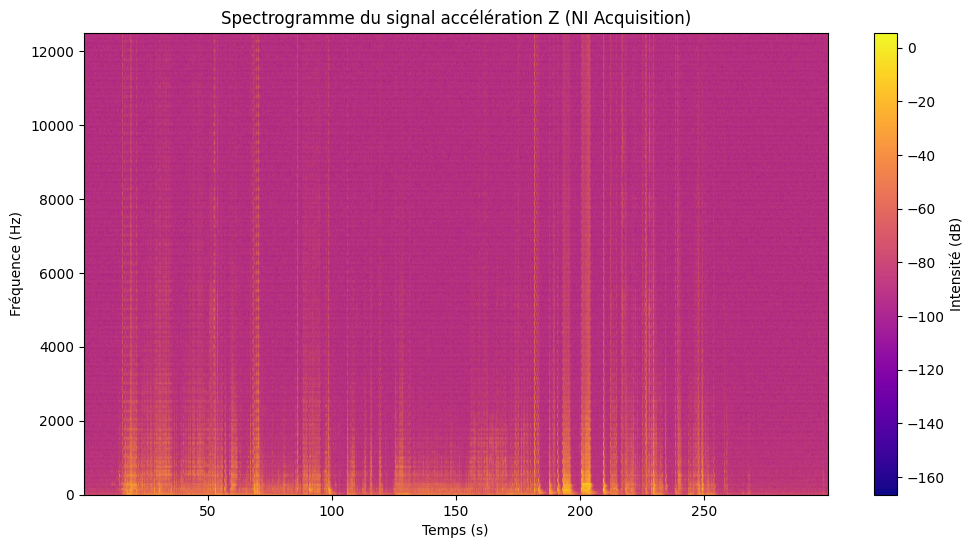

In [12]:
from scipy.signal import spectrogram


def generateSpectrogram(signal, fs=50000, window='hamming', nperseg=1024, noverlap=512, scaling='density', title='Spectrogramme du signal audio'):
    
    # Calcul du spectrogramme
    frequencies, times, Sxx = spectrogram(signal, fs, window=window, nperseg=nperseg, noverlap=noverlap, scaling=scaling)

    # Affichage du spectrogramme
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud', cmap='plasma')
    plt.colorbar(label='Intensité (dB)')
    plt.title(title)
    plt.xlabel('Temps (s)')
    plt.ylabel('Fréquence (Hz)')
    plt.ylim(0, fs / 2)
    plt.show()

fs = 50000  # Fréquence d'échantillonnage (en Hz)
accelX=accelXValues.copy()
accelY=accelYValues.copy()
accelZ=accelZValues.copy()
generateSpectrogram(accelX, fs=fs, title='Spectrogramme du signal accélération X (Plc Beckhoff)')
generateSpectrogram(accelY, fs=fs//2, title='Spectrogramme du signal accélération Y (NI Acquisition)')
generateSpectrogram(accelZ, fs=fs//2, title='Spectrogramme du signal accélération Z (NI Acquisition)')



In [12]:
import scipy.signal as signal

fs=50000
ft=25000
# Convert to 16-bit data
#audio = audio.astype(np.int16)
audio_resampled = signal.resample(accelX, int(len(accelX)*ft/fs))